Загрузка библиотек

In [163]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# класс для kNN классификатора
from sklearn.neighbors import KNeighborsClassifier 

# метод для кросс-валидации данных
from sklearn.model_selection import cross_val_score 

# алгоритм разбиения выборки на группы(фолды)
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
# алгоритм разбиения выборки на стратифицированные группы(фолды)
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
%matplotlib inline


# Загрузка датасета и  проверка загрузки

In [164]:
df = pd.read_csv('mushrooms.csv')

In [165]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [167]:
df_to_corr=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_to_corr.columns:
    df_to_corr[i]=le.fit_transform(df_to_corr[i])
df_to_scale = df_to_corr.copy()

In [168]:
df_to_corr.corr()['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

### Фичи которые могут помочь в опеределении ядовитости того или иного гриба (corr > 0)
### gill-size                   0.540024
### population                  0.298686
### habitat                     0.217179
### cap-surface                 0.178446
### spore-print-color           0.171961
### veil-color                  0.145142
### gill-attachment             0.129200

# Визуальный анализ этих фичей

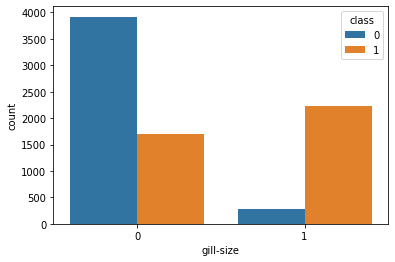

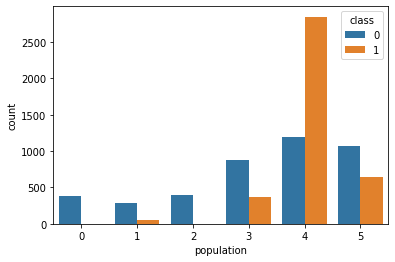

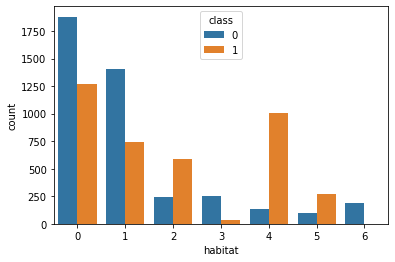

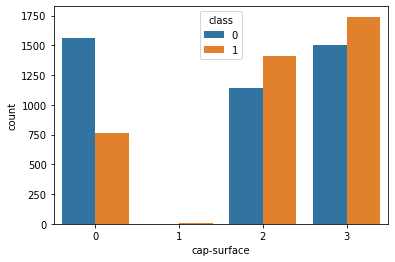

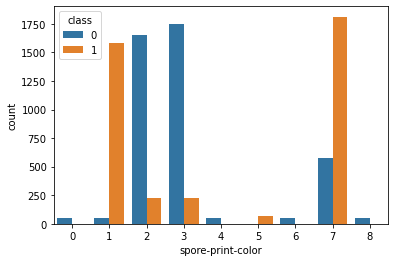

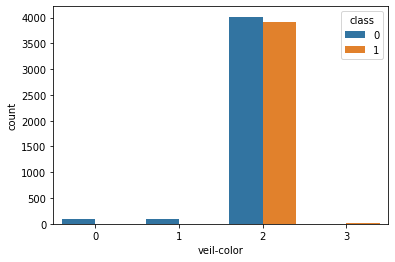

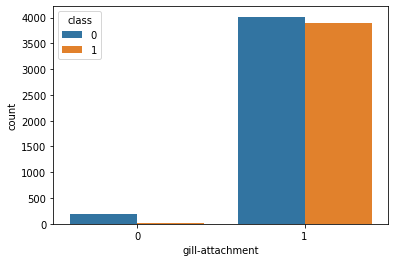

In [169]:
for i in ['gill-size', 'population', 'habitat', 'cap-surface', 'spore-print-color', 'veil-color', 'gill-attachment']:
    plt.figure()
    sns.countplot(x=i,hue='class',data=df_to_corr)

# Кластеризация 


In [170]:
y=df_to_corr['class']
X=df_to_corr.drop(['class','veil-type'],axis=1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

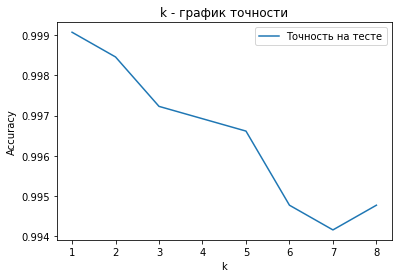

In [172]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 
plt.title('k - график точности')
plt.plot(neighbors, test_accuracy, label='Точность на тесте')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Лучшее k - 1, значит данные имеют разный масштаб и поэтому нужно заскейлить данные

# MinMax Scaler Ver

# Подбор test_size 

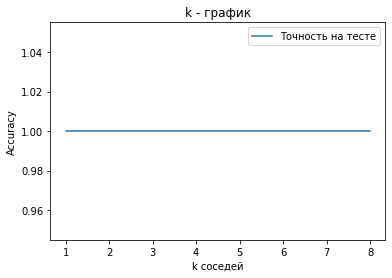

In [173]:
mm_scaler = MinMaxScaler()
col_names = list(df_to_scale.columns)
df_mm = mm_scaler.fit_transform(df_to_scale)
df_mm = pd.DataFrame(df_mm, columns=col_names)
X=df_mm.drop(['class','veil-type'],axis=1)
y=df_mm['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
neighbors = np.arange(1,9)
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 
plt.title('k - график')
plt.plot(neighbors, test_accuracy, label='Точность на тесте')
plt.legend()
plt.xlabel('k соседей')
plt.ylabel('Accuracy')
plt.show()

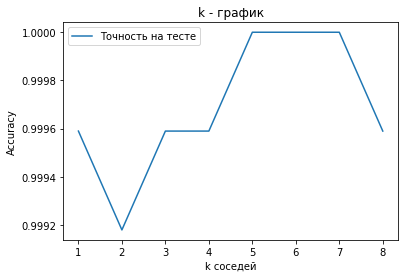

In [174]:
mm_scaler = MinMaxScaler()
col_names = list(df_to_scale.columns)
df_mm = mm_scaler.fit_transform(df_to_scale)
df_mm = pd.DataFrame(df_mm, columns=col_names)
X=df_mm.drop(['class','veil-type'],axis=1)
y=df_mm['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
neighbors = np.arange(1,9)
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 
plt.title('k - график')
plt.plot(neighbors, test_accuracy, label='Точность на тесте')
plt.legend()
plt.xlabel('k соседей')
plt.ylabel('Accuracy')
plt.show()


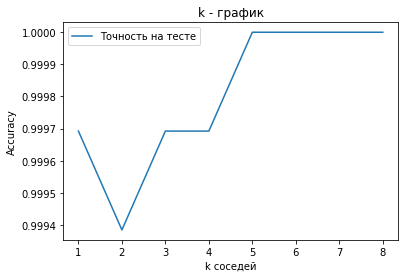

In [175]:
mm_scaler = MinMaxScaler()
col_names = list(df_to_scale.columns)
df_mm = mm_scaler.fit_transform(df_to_scale)
df_mm = pd.DataFrame(df_mm, columns=col_names)
X=df_mm.drop(['class','veil-type'],axis=1)
y=df_mm['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
neighbors = np.arange(1,9)
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 
plt.title('k - график')
plt.plot(neighbors, test_accuracy, label='Точность на тесте')
plt.legend()
plt.xlabel('k соседей')
plt.ylabel('Accuracy')
plt.show()

In [176]:
# разобъем датасет на train и test в пропорции 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
y_test = y_test.astype('int')

clf = KNeighborsClassifier(n_neighbors = 5, p=1)
clf.fit(X_train, y_train) # обучим модель

# предскажем тэги на тестовой подвыборке
y_pred = clf.predict(X_test).astype('int') 

print(classification_report(y_test, y_pred)) # напечатаем отчет о классификации

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



In [177]:
# разобъем датасет на train и test в пропорции 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
y_test = y_test.astype('int')

clf = KNeighborsClassifier(n_neighbors = 5, p=2)
clf.fit(X_train, y_train) # обучим модель

# предскажем тэги на тестовой подвыборке
y_pred = clf.predict(X_test).astype('int') 

print(classification_report(y_test, y_pred)) # напечатаем отчет о классификации

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



In [181]:
clf = KNeighborsClassifier()

#кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

%time scores = cross_val_score(clf, X, y, cv=cv)

print("Accuracy:", scores.mean())


Wall time: 978 ms
Accuracy: 0.9998769230769231


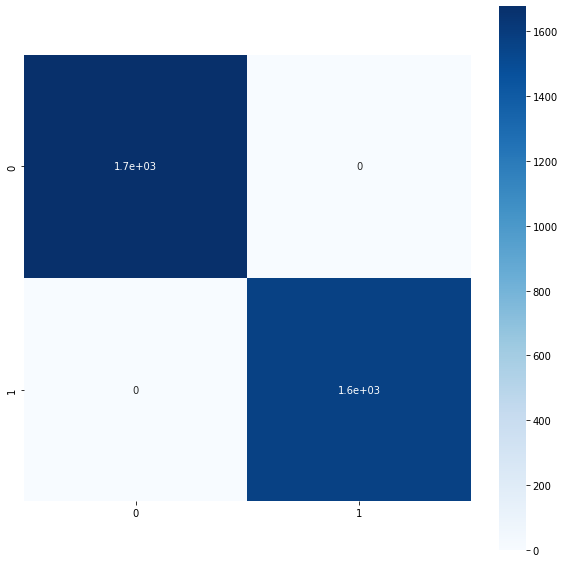

In [182]:
plt.figure(figsize=(10,10)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                cmap=plt.cm.Blues, square=True, 
                annot=True)